In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [5]:
training_path  = r'D:\Proiecte\AI\armd\data\raw\rotation_test'
training_files = list(Path(training_path).glob('*.TIFF'))

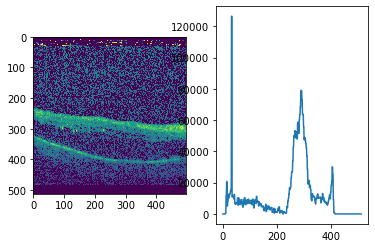

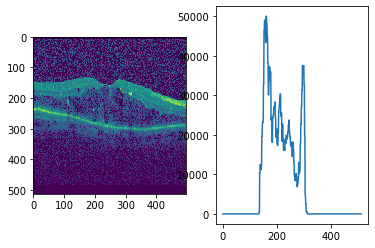

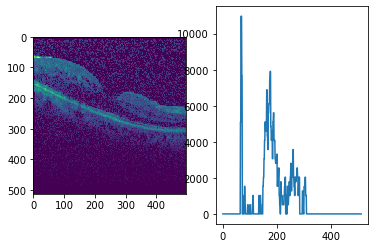

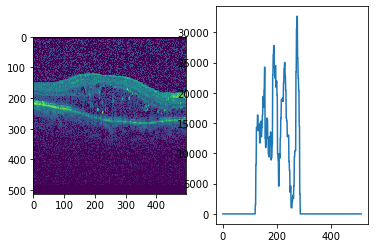

In [9]:
for img_path in training_files:
    img = cv2.imread(str(img_path), 0)
    _, th3 = cv2.threshold(img,120,255,cv2.THRESH_BINARY)
    sum_over_col = np.sum(th3, axis=1)
    fig1, [ax1, ax2] = plt.subplots(1,2)   
    ax1.imshow(img)
    ax2.plot(sum_over_col)  
    plt.show()

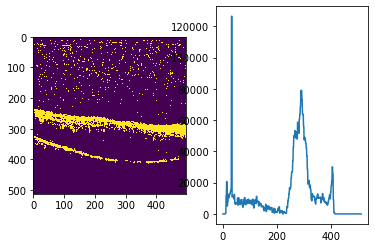

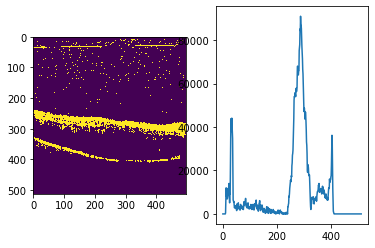

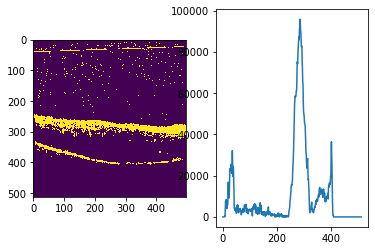

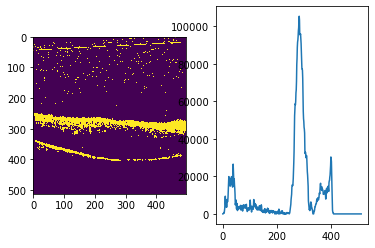

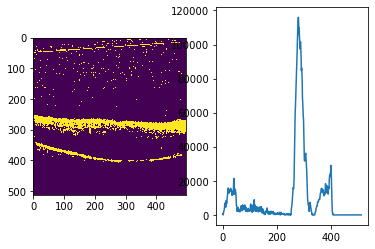

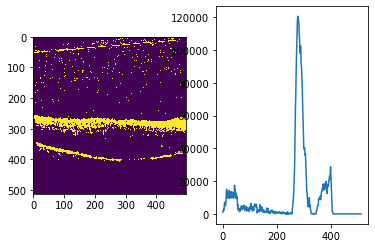

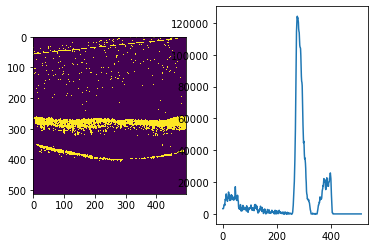

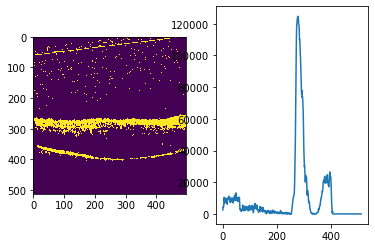

In [19]:
import numpy as np
import imutils

def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

img = cv2.imread(str(training_files[0]), 0)

for angle in np.arange(0, 45, 1):
    rotated = rotate_image(img, angle)
    _, th3 = cv2.threshold(rotated,120,255,cv2.THRESH_BINARY)
    sum_over_col = np.sum(th3, axis=1)
    fig1, [ax1, ax2] = plt.subplots(1,2)   
    ax1.imshow(th3)
    ax2.plot(sum_over_col)  
    cv2.imshow('rot', th3)
    key = cv2.waitKey()
    if key == ord('q'):
        break
cv2.destroyAllWindows()